In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Reading dataset

In [3]:
modi_data = pd.read_csv(r"ModiRelatedTweetsWithSentiment.csv")
rg_data   = pd.read_csv(r"RahulRelatedTweetsWithSentiment.csv")

# Data Analysis

In [4]:
modi_data.head()

,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,neg
1,1,2019-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
2,2,2019-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2019 \n23rd May 2019 will re...,neg
3,3,2019-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,pos
4,4,2019-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,pos


In [5]:
rg_data.head()

,Unnamed: 0,Date,User,Tweet,Emotion
0,0,2019-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...,pos
1,1,2019-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2019 an...,pos
2,2,2019-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...,neg
3,3,2019-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ...",pos
4,4,2019-05-18 18:31:10+00:00,VandanaMegastar,#LokSabhaElections2019 Anyone not having mass ...,pos


In [6]:
modi_data.describe()

,Unnamed: 0
count,1021.000000
mean,510.000000
std,294.881615
min,0.000000
25%,255.000000
50%,510.000000
75%,765.000000
max,1020.000000


In [7]:
rg_data.describe()

,Unnamed: 0
count,1030.000000
mean,514.500000
std,297.479691
min,0.000000
25%,257.250000
50%,514.500000
75%,771.750000
max,1029.000000


In [8]:
modi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1021 non-null   int64 
 1   Date        1021 non-null   object
 2   User        1021 non-null   object
 3   Tweet       1021 non-null   object
 4   Emotion     1021 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.0+ KB


In [9]:
rg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1030 non-null   int64 
 1   Date        1030 non-null   object
 2   User        1030 non-null   object
 3   Tweet       1030 non-null   object
 4   Emotion     1030 non-null   object
dtypes: int64(1), object(4)
memory usage: 40.4+ KB


In [10]:
print(modi_data.shape)
print(rg_data.shape)

(1021, 5)
(1030, 5)


# Checking for null values

In [11]:
modi_data.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
Emotion       0
dtype: int64

In [12]:
rg_data.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
Emotion       0
dtype: int64

In [13]:
modi_data = modi_data.dropna()
modi_data.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
Emotion       0
dtype: int64

# Checking for duplicates

In [14]:
modi_data.duplicated().sum()

0

In [15]:
rg_data.duplicated().sum()

0

# Data Visualization

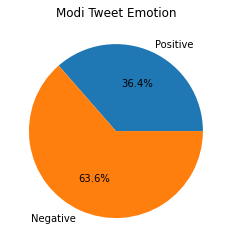

In [16]:
modi_dic = {'pos':0,'neg':0}
for i in modi_data['Emotion']:
    modi_dic[i] = modi_dic[i] + 1

plt.title('Modi Tweet Emotion')
plt.pie(modi_dic.values(),labels=['Positive','Negative'],autopct='%1.1f%%')
plt.show()

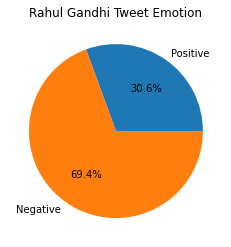

In [17]:
rg_dic = {'pos':0,'neg':0}
for i in rg_data['Emotion']:
    rg_dic[i] = rg_dic[i] + 1

plt.title('Rahul Gandhi Tweet Emotion')
plt.pie(rg_dic.values(),labels=['Positive','Negative'],autopct='%1.1f%%')
plt.show()

In [18]:
x2 = ['Modi','Rahul Gandhi']
x1 = {'Positive':[modi_dic['pos'],rg_dic['pos']],'Negative':[modi_dic['neg'],rg_dic['neg']]}
df = pd.DataFrame(x1,x2)
df

,Positive,Negative
Modi,372,649
Rahul Gandhi,315,715


# Data Preprocessing

In [19]:
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

C:\Users\posah\anacondap\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
lm = WordNetLemmatizer()

In [21]:
sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
def pre_processing(tweets):
    processed_tweets = []
    for i in tweets:
        p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)      #removing links and mentions
        p = re.sub(r'[^A-Za-z]',' ',p)                  #removing special characters and numbers
        p = p.lower()                                   #lowercasing
        p = word_tokenize(p)                            #tokenization
        p = [i for i in p if i not in sw]               #removing stopwords
        p = [lm.lemmatize(i) for i in p]                #lemmatization
        p = ' '.join(p)
        processed_tweets.append(p)
    return processed_tweets

In [23]:
modi_tweet = pre_processing(modi_data['Tweet'])
print("Modi Tweets pre-processing Done")
rg_tweet = pre_processing(rg_data['Tweet'])
print("RG Tweets pre-processing Done")

Modi Tweets pre-processing Done
RG Tweets pre-processing Done


In [24]:
modi_emotion_float = []
for i in modi_data['Emotion']:
    if i == 'pos':
        modi_emotion_float.append(1.0)
    else:
        modi_emotion_float.append(0.0)

In [25]:
modi_data['Emotion_f'] = modi_emotion_float

In [26]:
rg_emotion_float = []
for i in rg_data['Emotion']:
    if i == 'pos':
        rg_emotion_float.append(1.0)
    else:
        rg_emotion_float.append(0.0)

In [27]:
rg_data['Emotion_f'] = rg_emotion_float

# Transforming the words into vectors using tf-idf

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tf_idf = TfidfVectorizer()
modi_features = tf_idf.fit_transform(modi_tweet).toarray()
print(modi_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
tf_idf = TfidfVectorizer()
rg_features = tf_idf.fit_transform(rg_tweet).toarray()
print(rg_features)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# X & Y array

In [31]:
modi_x = modi_features
modi_y = modi_data.iloc[:,-1]
print(modi_x.shape,modi_y.shape)
print(type(modi_x),type(modi_y))

(1021, 4677) (1021,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [32]:
rg_x = rg_features
rg_y = rg_data.iloc[:,-1]
print(rg_x.shape,rg_y.shape)
print(type(rg_x),type(rg_y))

(1030, 4809) (1030,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


# MODI SPLITING DATA INTO TRAINING AND TESTING

In [33]:
from sklearn.model_selection import train_test_split
modi_x_train,modi_x_test,modi_y_train,modi_y_test = train_test_split(modi_x,modi_y,test_size=0.25,\
                                                                     random_state=42)
print(modi_x_train.shape)
print(modi_x_test.shape)
print(modi_y_train.shape)
print(modi_y_test.shape)

(765, 4677)
(256, 4677)
(765,)
(256,)


In [34]:
modi_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
modi_y

0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1016    0.0
1017    0.0
1018    1.0
1019    1.0
1020    1.0
Name: Emotion_f, Length: 1021, dtype: float64

# MODEL TRAINING

### MODI

1. `Multinomial Naive Bayes`

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
modi_mnb = MultinomialNB()
modi_mnb.fit(modi_x_train,modi_y_train)

MultinomialNB()

In [38]:
modi_mnb_pred = modi_mnb.predict(modi_x_test)
modi_mnb_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [39]:
print('Training Score : ',modi_mnb.score(modi_x_train,modi_y_train))
print('Testing Score  : ',modi_mnb.score(modi_x_test,modi_y_test))

Training Score :  0.8222222222222222
Testing Score  :  0.63671875


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [41]:
modi_mnb_acc = accuracy_score(modi_y_test,modi_mnb_pred)
modi_mnb_pr  = precision_score(modi_y_test,modi_mnb_pred,average='macro')
modi_mnb_rec = recall_score(modi_y_test,modi_mnb_pred,average='macro')
modi_mnb_f1  = f1_score(modi_y_test,modi_mnb_pred,average='macro')
print('Accuracy by MNB  : ', modi_mnb_acc)
print('Precision by MNB : ', modi_mnb_pr)
print('Recall by MNB    : ', modi_mnb_rec)
print('F1 score by MNB  : ', modi_mnb_f1)

Accuracy by MNB  :  0.63671875
Precision by MNB :  0.7630081300813008
Recall by MNB    :  0.5413286489939316
F1 score by MNB  :  0.4651209813304576


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(confusion_matrix(modi_y_test,modi_mnb_pred))
print(classification_report(modi_y_test,modi_mnb_pred))

[[154   1]
 [ 92   9]]
              precision    recall  f1-score   support

         0.0       0.63      0.99      0.77       155
         1.0       0.90      0.09      0.16       101

    accuracy                           0.64       256
   macro avg       0.76      0.54      0.47       256
weighted avg       0.73      0.64      0.53       256



2. `Gaussian Navies Bayes`

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
modi_gnb = GaussianNB()
modi_gnb.fit(modi_x_train,modi_y_train)

GaussianNB()

In [46]:
modi_gnb_pred = modi_gnb.predict(modi_x_test)
modi_gnb_pred

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [47]:
print("Training Score : ",modi_gnb.score(modi_x_train,modi_y_train))
print("Testing Score  : ",modi_gnb.score(modi_x_test,modi_y_test))

Training Score :  0.9856209150326798
Testing Score  :  0.6328125


In [48]:
modi_gnb_acc = accuracy_score(modi_y_test,modi_gnb_pred)
modi_gnb_pr  = precision_score(modi_y_test,modi_gnb_pred,average='macro')
modi_gnb_rec = recall_score(modi_y_test,modi_gnb_pred,average='macro')
modi_gnb_f1  = f1_score(modi_y_test,modi_gnb_pred,average='macro')
print('Accuracy by gnb  : ', modi_gnb_acc)
print('Precision by gnb : ', modi_gnb_pr)
print('Recall by gnb    : ', modi_gnb_rec)
print('F1 score by gnb  : ', modi_gnb_f1)

Accuracy by gnb  :  0.6328125
Precision by gnb :  0.6092346263667386
Recall by gnb    :  0.6001916320664324
F1 score by gnb  :  0.6012725344644752


In [49]:
print(confusion_matrix(modi_y_test,modi_gnb_pred))
print(classification_report(modi_y_test,modi_gnb_pred))

[[117  38]
 [ 56  45]]
              precision    recall  f1-score   support

         0.0       0.68      0.75      0.71       155
         1.0       0.54      0.45      0.49       101

    accuracy                           0.63       256
   macro avg       0.61      0.60      0.60       256
weighted avg       0.62      0.63      0.62       256



3. `Logistic Regression`

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
modi_lr = LogisticRegression()
modi_lr.fit(modi_x_train,modi_y_train)

LogisticRegression()

In [52]:
modi_lr_pred = modi_lr.predict(modi_x_test)
modi_lr_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [53]:
print("Training Score : ",modi_lr.score(modi_x_train,modi_y_train))
print("Testing Score  : ",modi_lr.score(modi_x_test,modi_y_test))

Training Score :  0.8065359477124183
Testing Score  :  0.65234375


In [54]:
modi_lr_acc = accuracy_score(modi_y_test,modi_lr_pred)
modi_lr_pr  = precision_score(modi_y_test,modi_lr_pred,average='macro')
modi_lr_rec = recall_score(modi_y_test,modi_lr_pred,average='macro')
modi_lr_f1  = f1_score(modi_y_test,modi_lr_pred,average='macro')
print('Accuracy by lr  : ', modi_lr_acc)
print('Precision by lr : ', modi_lr_pr)
print('Recall by lr    : ', modi_lr_rec)
print('F1 score by lr  : ', modi_lr_f1)

Accuracy by lr  :  0.65234375
Precision by lr :  0.8176229508196722
Recall by lr    :  0.5594059405940595
F1 score by lr  :  0.49466586821034886


In [55]:
print(confusion_matrix(modi_y_test,modi_lr_pred))
print(classification_report(modi_y_test,modi_lr_pred))

[[155   0]
 [ 89  12]]
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78       155
         1.0       1.00      0.12      0.21       101

    accuracy                           0.65       256
   macro avg       0.82      0.56      0.49       256
weighted avg       0.78      0.65      0.55       256



4. `KNN`

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
modi_knn = KNeighborsClassifier(n_neighbors=9)
modi_knn.fit(modi_x_train,modi_y_train)

KNeighborsClassifier(n_neighbors=9)

In [58]:
modi_knn_pred = modi_knn.predict(modi_x_test)
modi_knn_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0.

In [59]:
print("Training Score : ",modi_knn.score(modi_x_train,modi_y_train))
print("Testing Score  : ",modi_knn.score(modi_x_test,modi_y_test))

Training Score :  0.7712418300653595
Testing Score  :  0.64453125


In [60]:
modi_knn_acc = accuracy_score(modi_y_test,modi_knn_pred)
modi_knn_pr  = precision_score(modi_y_test,modi_knn_pred,average='macro')
modi_knn_rec = recall_score(modi_y_test,modi_knn_pred,average='macro')
modi_knn_f1  = f1_score(modi_y_test,modi_knn_pred,average='macro')
print('Accuracy by knn  : ', modi_knn_acc)
print('Precision by knn : ', modi_knn_pr)
print('Recall by knn    : ', modi_knn_rec)
print('F1 score by knn  : ', modi_knn_f1)

Accuracy by knn  :  0.64453125
Precision by knn :  0.6227851605758583
Recall by knn    :  0.6133184286170552
F1 score by knn  :  0.614910323167204


In [61]:
print(confusion_matrix(modi_y_test,modi_knn_pred))
print(classification_report(modi_y_test,modi_knn_pred))

[[118  37]
 [ 54  47]]
              precision    recall  f1-score   support

         0.0       0.69      0.76      0.72       155
         1.0       0.56      0.47      0.51       101

    accuracy                           0.64       256
   macro avg       0.62      0.61      0.61       256
weighted avg       0.64      0.64      0.64       256



5. `SVM`

In [62]:
from sklearn.svm import SVC
modi_svm = SVC(kernel='linear', C=1.0, random_state=42)
modi_svm.fit(modi_x_train,modi_y_train)

SVC(kernel='linear', random_state=42)

In [63]:
modi_svm_pred = modi_svm.predict(modi_x_test)
modi_svm_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [64]:
print("Training Score : ",modi_svm.score(modi_x_train,modi_y_train))
print("Testing Score  : ",modi_svm.score(modi_x_test,modi_y_test))

Training Score :  0.9555555555555556
Testing Score  :  0.6796875


In [65]:
modi_svm_acc = accuracy_score(modi_y_test,modi_svm_pred)
modi_svm_pr  = precision_score(modi_y_test,modi_svm_pred,average='macro')
modi_svm_rec = recall_score(modi_y_test,modi_svm_pred,average='macro')
modi_svm_f1  = f1_score(modi_y_test,modi_svm_pred,average='macro')
print('Accuracy by svm  : ', modi_svm_acc)
print('Precision by svm : ', modi_svm_pr)
print('Recall by svm    : ', modi_svm_rec)
print('F1 score by svm  : ', modi_svm_f1)

Accuracy by svm  :  0.6796875
Precision by svm :  0.7058962542833511
Recall by svm    :  0.6113062919195145
F1 score by svm  :  0.5969278033794163


In [66]:
print(confusion_matrix(modi_y_test,modi_svm_pred))
print(classification_report(modi_y_test,modi_svm_pred))

[[145  10]
 [ 72  29]]
              precision    recall  f1-score   support

         0.0       0.67      0.94      0.78       155
         1.0       0.74      0.29      0.41       101

    accuracy                           0.68       256
   macro avg       0.71      0.61      0.60       256
weighted avg       0.70      0.68      0.64       256



6. `Decision Tree`

In [67]:
from sklearn.tree import DecisionTreeClassifier
modi_dt = DecisionTreeClassifier()
modi_dt.fit(modi_x_train,modi_y_train)

DecisionTreeClassifier()

In [68]:
modi_dt_pred = modi_dt.predict(modi_x_test)
modi_dt_pred

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0.

In [69]:
print("Training Score : ",modi_dt.score(modi_x_train,modi_y_train))
print("Testing Score  : ",modi_dt.score(modi_x_test,modi_y_test))

Training Score :  1.0
Testing Score  :  0.640625


In [70]:
modi_dt_acc = accuracy_score(modi_y_test,modi_dt_pred)
modi_dt_pr  = precision_score(modi_y_test,modi_dt_pred,average='macro')
modi_dt_rec = recall_score(modi_y_test,modi_dt_pred,average='macro')
modi_dt_f1  = f1_score(modi_y_test,modi_dt_pred,average='macro')
print('Accuracy by dt  : ', modi_dt_acc)
print('Precision by dt : ', modi_dt_pr)
print('Recall by dt    : ', modi_dt_rec)
print('F1 score by dt  : ', modi_dt_f1)

Accuracy by dt  :  0.640625
Precision by dt :  0.617320503330866
Recall by dt    :  0.5911210475886298
F1 score by dt  :  0.5873282870759742


In [71]:
print(confusion_matrix(modi_y_test,modi_dt_pred))
print(classification_report(modi_y_test,modi_dt_pred))

[[128  27]
 [ 65  36]]
              precision    recall  f1-score   support

         0.0       0.66      0.83      0.74       155
         1.0       0.57      0.36      0.44       101

    accuracy                           0.64       256
   macro avg       0.62      0.59      0.59       256
weighted avg       0.63      0.64      0.62       256



7. `Random Forest`

In [72]:
from sklearn.ensemble import RandomForestClassifier
modi_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modi_rf.fit(modi_x_train,modi_y_train)

RandomForestClassifier(random_state=42)

In [73]:
modi_rf_pred = modi_rf.predict(modi_x_test)
modi_rf_pred

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0.

In [74]:
print("Training Score : ",modi_rf.score(modi_x_train,modi_y_train))
print("Testing Score  : ",modi_rf.score(modi_x_test,modi_y_test))

Training Score :  1.0
Testing Score  :  0.703125


In [75]:
modi_rf_acc = accuracy_score(modi_y_test,modi_rf_pred)
modi_rf_pr  = precision_score(modi_y_test,modi_rf_pred,average='macro')
modi_rf_rec = recall_score(modi_y_test,modi_rf_pred,average='macro')
modi_rf_f1  = f1_score(modi_y_test,modi_rf_pred,average='macro')
print('Accuracy by rf  : ', modi_rf_acc)
print('Precision by rf : ', modi_rf_pr)
print('Recall by rf    : ', modi_rf_rec)
print('F1 score by rf  : ', modi_rf_f1)

Accuracy by rf  :  0.703125
Precision by rf :  0.7779589618154641
Recall by rf    :  0.6306611306291919
F1 score by rf  :  0.6158888099186607


In [76]:
print(confusion_matrix(modi_y_test,modi_rf_pred))
print(classification_report(modi_y_test,modi_rf_pred))

[[151   4]
 [ 72  29]]
              precision    recall  f1-score   support

         0.0       0.68      0.97      0.80       155
         1.0       0.88      0.29      0.43       101

    accuracy                           0.70       256
   macro avg       0.78      0.63      0.62       256
weighted avg       0.76      0.70      0.65       256



# RG SPLITING DATA INTO TRAINING AND TESTING

In [77]:
rg_x_train,rg_x_test,rg_y_train,rg_y_test = train_test_split(rg_x,rg_y,test_size=0.25,
                                                             random_state=42)
print(rg_x_train.shape)
print(rg_x_test.shape)
print(rg_y_train.shape)
print(rg_y_test.shape)

(772, 4809)
(258, 4809)
(772,)
(258,)


In [78]:
rg_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
rg_y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Name: Emotion_f, Length: 1030, dtype: float64

## Model Training

### Rahul Gandhi

1. `Multinomial Naive Bayes`

In [80]:
rg_mnb = MultinomialNB()
rg_mnb.fit(rg_x_train,rg_y_train)

MultinomialNB()

In [81]:
rg_mnb_pred = rg_mnb.predict(rg_x_test)
rg_mnb_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [82]:
print("Training Score : ",rg_mnb.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_mnb.score(rg_x_test,rg_y_test))

Training Score :  0.7538860103626943
Testing Score  :  0.6821705426356589


In [83]:
rg_mnb_acc = accuracy_score(rg_y_test,rg_mnb_pred)
rg_mnb_pr  = precision_score(rg_y_test,rg_mnb_pred,average='macro')
rg_mnb_rec = recall_score(rg_y_test,rg_mnb_pred,average='macro')
rg_mnb_f1  = f1_score(rg_y_test,rg_mnb_pred,average='macro')
print('Accuracy by mnb  : ', rg_mnb_acc)
print('Precision by mnb : ', rg_mnb_pr)
print('Recall by mnb    : ', rg_mnb_rec)
print('F1 score by mnb  : ', rg_mnb_f1)

Accuracy by mnb  :  0.6821705426356589
Precision by mnb :  0.8404669260700389
Recall by mnb    :  0.5060240963855421
F1 score by mnb  :  0.41699735449735453


In [84]:
print(confusion_matrix(rg_y_test,rg_mnb_pred))
print(classification_report(rg_y_test,rg_mnb_pred))

[[175   0]
 [ 82   1]]
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       175
         1.0       1.00      0.01      0.02        83

    accuracy                           0.68       258
   macro avg       0.84      0.51      0.42       258
weighted avg       0.78      0.68      0.56       258



2. `Gaussian Navies Bayes`

In [85]:
rg_gnb = GaussianNB()
rg_gnb.fit(rg_x_train,rg_y_train)

GaussianNB()

In [86]:
rg_gnb_pred = rg_gnb.predict(rg_x_test)
rg_gnb_pred

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [87]:
print("Training Score : ",rg_gnb.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_gnb.score(rg_x_test,rg_y_test))

Training Score :  0.9870466321243523
Testing Score  :  0.6472868217054264


In [88]:
rg_gnb_acc = accuracy_score(rg_y_test,rg_gnb_pred)
rg_gnb_pr  = precision_score(rg_y_test,rg_gnb_pred,average='macro')
rg_gnb_rec = recall_score(rg_y_test,rg_gnb_pred,average='macro')
rg_gnb_f1  = f1_score(rg_y_test,rg_gnb_pred,average='macro')
print('Accuracy by gnb  : ', rg_gnb_acc)
print('Precision by gnb : ', rg_gnb_pr)
print('Recall by gnb    : ', rg_gnb_rec)
print('F1 score by gnb  : ', rg_gnb_f1)

Accuracy by gnb  :  0.6472868217054264
Precision by gnb :  0.5682461103253182
Recall by gnb    :  0.5531497418244407
F1 score by gnb  :  0.5519722153311832


In [89]:
print(confusion_matrix(rg_y_test,rg_gnb_pred))
print(classification_report(rg_y_test,rg_gnb_pred))

[[143  32]
 [ 59  24]]
              precision    recall  f1-score   support

         0.0       0.71      0.82      0.76       175
         1.0       0.43      0.29      0.35        83

    accuracy                           0.65       258
   macro avg       0.57      0.55      0.55       258
weighted avg       0.62      0.65      0.63       258



3. `Logistic Regression`

In [90]:
rg_lr = LogisticRegression()
rg_lr.fit(rg_x_train,rg_y_train)

LogisticRegression()

In [91]:
rg_lr_pred = rg_lr.predict(rg_x_test)
rg_lr_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [92]:
print("Training Score : ",rg_lr.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_lr.score(rg_x_test,rg_y_test))

Training Score :  0.7603626943005182
Testing Score  :  0.686046511627907


In [93]:
rg_lr_acc = accuracy_score(rg_y_test,rg_lr_pred)
rg_lr_pr  = precision_score(rg_y_test,rg_lr_pred,average='macro')
rg_lr_rec = recall_score(rg_y_test,rg_lr_pred,average='macro')
rg_lr_f1  = f1_score(rg_y_test,rg_lr_pred,average='macro')
print('Accuracy by lr  : ', rg_lr_acc)
print('Precision by lr : ', rg_lr_pr)
print('Recall by lr    : ', rg_lr_rec)
print('F1 score by lr  : ', rg_lr_f1)

Accuracy by lr  :  0.686046511627907
Precision by lr :  0.841796875
Recall by lr    :  0.5120481927710844
F1 score by lr  :  0.4295618943633138


In [94]:
print(confusion_matrix(rg_y_test,rg_lr_pred))
print(classification_report(rg_y_test,rg_lr_pred))

[[175   0]
 [ 81   2]]
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       175
         1.0       1.00      0.02      0.05        83

    accuracy                           0.69       258
   macro avg       0.84      0.51      0.43       258
weighted avg       0.79      0.69      0.57       258



4. `KNN`

In [95]:
rg_knn = KNeighborsClassifier(n_neighbors=9)
rg_knn.fit(rg_x_train,rg_y_train)

KNeighborsClassifier(n_neighbors=9)

In [96]:
rg_knn_pred = rg_knn.predict(rg_x_test)
rg_knn_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [97]:
print("Training Score : ",rg_knn.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_knn.score(rg_x_test,rg_y_test))

Training Score :  0.7474093264248705
Testing Score  :  0.7131782945736435


In [98]:
rg_knn_acc = accuracy_score(rg_y_test,rg_knn_pred)
rg_knn_pr  = precision_score(rg_y_test,rg_knn_pred,average='macro')
rg_knn_rec = recall_score(rg_y_test,rg_knn_pred,average='macro')
rg_knn_f1  = f1_score(rg_y_test,rg_knn_pred,average='macro')
print('Accuracy by knn  : ', rg_knn_acc)
print('Precision by knn : ', rg_knn_pr)
print('Recall by knn    : ', rg_knn_rec)
print('F1 score by knn  : ', rg_knn_f1)

Accuracy by knn  :  0.7131782945736435
Precision by knn :  0.6712374957850962
Recall by knn    :  0.6048881239242685
F1 score by knn  :  0.6072251481237656


In [99]:
print(confusion_matrix(rg_y_test,rg_knn_pred))
print(classification_report(rg_y_test,rg_knn_pred))

[[159  16]
 [ 58  25]]
              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       175
         1.0       0.61      0.30      0.40        83

    accuracy                           0.71       258
   macro avg       0.67      0.60      0.61       258
weighted avg       0.69      0.71      0.68       258



5. `SVM`

In [100]:
rg_svm = SVC(kernel='linear', C=1.0, random_state=42)
rg_svm.fit(rg_x_train,rg_y_train)

SVC(kernel='linear', random_state=42)

In [101]:
rg_svm_pred = rg_svm.predict(rg_x_test)
rg_svm_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [102]:
print("Training Score : ",rg_svm.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_svm.score(rg_x_test,rg_y_test))

Training Score :  0.9520725388601037
Testing Score  :  0.686046511627907


In [103]:
rg_svm_acc = accuracy_score(rg_y_test,rg_svm_pred)
rg_svm_pr  = precision_score(rg_y_test,rg_svm_pred,average='macro')
rg_svm_rec = recall_score(rg_y_test,rg_svm_pred,average='macro')
rg_svm_f1  = f1_score(rg_y_test,rg_svm_pred,average='macro')
print('Accuracy by svm  : ', rg_svm_acc)
print('Precision by svm : ', rg_svm_pr)
print('Recall by svm    : ', rg_svm_rec)
print('F1 score by svm  : ', rg_svm_f1)

Accuracy by svm  :  0.686046511627907
Precision by svm :  0.6205238726790451
Recall by svm    :  0.550051635111876
F1 score by svm  :  0.5289317674638775


In [104]:
print(confusion_matrix(rg_y_test,rg_svm_pred))
print(classification_report(rg_y_test,rg_svm_pred))

[[163  12]
 [ 69  14]]
              precision    recall  f1-score   support

         0.0       0.70      0.93      0.80       175
         1.0       0.54      0.17      0.26        83

    accuracy                           0.69       258
   macro avg       0.62      0.55      0.53       258
weighted avg       0.65      0.69      0.63       258



6. `Decision Tree`

In [105]:
rg_dt = DecisionTreeClassifier()
rg_dt.fit(rg_x_train,rg_y_train)

DecisionTreeClassifier()

In [106]:
rg_dt_pred = rg_dt.predict(rg_x_test)
rg_dt_pred

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0.

In [107]:
print("Training Score : ",rg_dt.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_dt.score(rg_x_test,rg_y_test))

Training Score :  0.9987046632124352
Testing Score  :  0.5852713178294574


In [108]:
rg_dt_acc = accuracy_score(rg_y_test,rg_dt_pred)
rg_dt_pr  = precision_score(rg_y_test,rg_dt_pred,average='macro')
rg_dt_rec = recall_score(rg_y_test,rg_dt_pred,average='macro')
rg_dt_f1  = f1_score(rg_y_test,rg_dt_pred,average='macro')
print('Accuracy by dt  : ', rg_dt_acc)
print('Precision by dt : ', rg_dt_pr)
print('Recall by dt    : ', rg_dt_rec)
print('F1 score by dt  : ', rg_dt_f1)

Accuracy by dt  :  0.5852713178294574
Precision by dt :  0.4858585858585859
Recall by dt    :  0.48843373493975906
F1 score by dt  :  0.4824424904853859


In [109]:
print(confusion_matrix(rg_y_test,rg_dt_pred))
print(classification_report(rg_y_test,rg_dt_pred))

[[133  42]
 [ 65  18]]
              precision    recall  f1-score   support

         0.0       0.67      0.76      0.71       175
         1.0       0.30      0.22      0.25        83

    accuracy                           0.59       258
   macro avg       0.49      0.49      0.48       258
weighted avg       0.55      0.59      0.56       258



7. `Random Forest`

In [110]:
rg_rf = RandomForestClassifier(n_estimators=100, random_state=42)
rg_rf.fit(rg_x_train,rg_y_train)

RandomForestClassifier(random_state=42)

In [111]:
rg_rf_pred = rg_rf.predict(rg_x_test)
rg_rf_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [112]:
print("Training Score : ",rg_rf.score(rg_x_train,rg_y_train))
print("Testing Score  : ",rg_rf.score(rg_x_test,rg_y_test))

Training Score :  0.9987046632124352
Testing Score  :  0.7015503875968992


In [113]:
rg_rf_acc = accuracy_score(rg_y_test,rg_rf_pred)
rg_rf_pr  = precision_score(rg_y_test,rg_rf_pred,average='macro')
rg_rf_rec = recall_score(rg_y_test,rg_rf_pred,average='macro')
rg_rf_f1  = f1_score(rg_y_test,rg_rf_pred,average='macro')
print('Accuracy by rf  : ', rg_rf_acc)
print('Precision by rf : ', rg_rf_pr)
print('Recall by rf    : ', rg_rf_rec)
print('F1 score by rf  : ', rg_rf_f1)

Accuracy by rf  :  0.7015503875968992
Precision by rf :  0.7855
Recall by rf    :  0.5393115318416524
F1 score by rf  :  0.4863348416289593


In [114]:
print(confusion_matrix(rg_y_test,rg_rf_pred))
print(classification_report(rg_y_test,rg_rf_pred))

[[174   1]
 [ 76   7]]
              precision    recall  f1-score   support

         0.0       0.70      0.99      0.82       175
         1.0       0.88      0.08      0.15        83

    accuracy                           0.70       258
   macro avg       0.79      0.54      0.49       258
weighted avg       0.75      0.70      0.60       258



# Model Selection

## MODI

In [115]:
modi_x1 = {'Accuracy':[modi_mnb_acc,modi_gnb_acc,modi_lr_acc,modi_knn_acc,
                       modi_svm_acc,modi_dt_acc,modi_rf_acc],
      'Precision (mean)':[modi_mnb_pr,modi_gnb_pr,modi_lr_pr,modi_knn_pr,
                         modi_svm_pr,modi_dt_pr,modi_rf_pr],
      'Recall (mean)':[modi_mnb_rec,modi_gnb_rec,modi_lr_rec,modi_knn_rec,
                       modi_svm_rec,modi_dt_rec,modi_rf_rec],
      'F1-Score (mean)':[modi_mnb_f1,modi_gnb_f1,modi_lr_f1,modi_knn_f1,
                        modi_svm_f1,modi_dt_f1,modi_rf_f1]}
modi_x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
           'K-NearestNeighbors','Support Vector Machine','Decision Tree','Random Forest']
modi_df = pd.DataFrame(modi_x1,modi_x2)
modi_df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.636719,0.763008,0.541329,0.465121
Gaussian Navies Bayes,0.632812,0.609235,0.600192,0.601273
Logistic Regression,0.652344,0.817623,0.559406,0.494666
K-NearestNeighbors,0.644531,0.622785,0.613318,0.614910
Support Vector Machine,0.679688,0.705896,0.611306,0.596928
Decision Tree,0.640625,0.617321,0.591121,0.587328
Random Forest,0.703125,0.777959,0.630661,0.615889


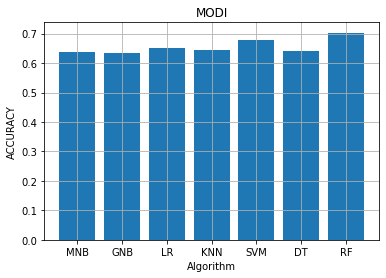

In [116]:
plt.bar(x=['MNB','GNB','LR','KNN','SVM','DT','RF'],
        height=[modi_mnb_acc,modi_gnb_acc,modi_lr_acc,modi_knn_acc,
                modi_svm_acc,modi_dt_acc,modi_rf_acc])
plt.xlabel("Algorithm")
plt.ylabel("ACCURACY")
plt.title("MODI")
plt.grid()
plt.show()

## Rahul Gandhi

In [117]:
rg_x1 = {'Accuracy':[rg_mnb_acc,rg_gnb_acc,rg_lr_acc,rg_knn_acc,
                       rg_svm_acc,rg_dt_acc,rg_rf_acc],
      'Precision (mean)':[rg_mnb_pr,rg_gnb_pr,rg_lr_pr,rg_knn_pr,
                         rg_svm_pr,rg_dt_pr,rg_rf_pr],
      'Recall (mean)':[rg_mnb_rec,rg_gnb_rec,rg_lr_rec,rg_knn_rec,
                       rg_svm_rec,rg_dt_rec,rg_rf_rec],
      'F1-Score (mean)':[rg_mnb_f1,rg_gnb_f1,rg_lr_f1,rg_knn_f1,
                        rg_svm_f1,rg_dt_f1,rg_rf_f1]}
rg_x2 = ['Multinomial Navies Bayes','Gaussian Navies Bayes','Logistic Regression',
           'K-NearestNeighbors','Support Vector Machine','Decision Tree','Random Forest']
rg_df = pd.DataFrame(rg_x1,rg_x2)
rg_df

,Accuracy,Precision (mean),Recall (mean),F1-Score (mean)
Multinomial Navies Bayes,0.682171,0.840467,0.506024,0.416997
Gaussian Navies Bayes,0.647287,0.568246,0.553150,0.551972
Logistic Regression,0.686047,0.841797,0.512048,0.429562
K-NearestNeighbors,0.713178,0.671237,0.604888,0.607225
Support Vector Machine,0.686047,0.620524,0.550052,0.528932
Decision Tree,0.585271,0.485859,0.488434,0.482442
Random Forest,0.701550,0.785500,0.539312,0.486335


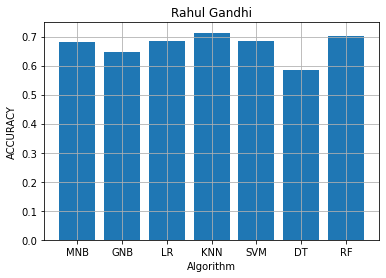

In [118]:
plt.bar(x=['MNB','GNB','LR','KNN','SVM','DT','RF'],height=[rg_mnb_acc,rg_gnb_acc,rg_lr_acc,rg_knn_acc,
                                            rg_svm_acc,rg_dt_acc,rg_rf_acc])
plt.xlabel("Algorithm")
plt.ylabel("ACCURACY")
plt.title("Rahul Gandhi")
plt.grid()
plt.show()

By observing the graphs which was plotted between Multinomial Navies Bayes, Gaussian Navies Bayes, 
Logistic Regression,K-Nearest Negibours algorithms, Support Vector machine, Decision Tree, Random Forest and there resepective algoritms, concluding that Random Forest is best for Modi and K- Nearest Negibours for Rahul Gandhi data set

# TESTING

In [119]:
modi_test = pd.read_csv(r"tweetsModi.csv")
rg_test = pd.read_csv(r"tweetsRG.csv")

In [120]:
print(modi_test.head(5))
print(rg_test.head(5))

   Unnamed: 0                       Date          User  \
0           0  2019-05-12 01:17:12+00:00  narendramodi   
1           1  2019-05-09 02:00:26+00:00  narendramodi   
2           2  2019-05-08 13:41:51+00:00  narendramodi   
3           3  2019-05-06 01:18:46+00:00  narendramodi   
4           4  2019-04-29 01:18:03+00:00  narendramodi   

                                               Tweet  
0  Yet another phase of the 2019 Lok Sabha electi...  
1  Will be addressing five rallies today. \n\nLoo...  
2  Delhi has always given great love and affectio...  
3  Requesting all those voting in today’s fifth p...  
4  Another phase of the General Elections begins ...  
   Unnamed: 0                       Date         User  \
0           0  2019-05-18 06:59:40+00:00  RahulGandhi   
1           1  2019-05-17 12:39:41+00:00  RahulGandhi   
2           2  2019-05-14 10:11:18+00:00  RahulGandhi   
3           3  2019-05-09 16:01:12+00:00  RahulGandhi   
4           4  2019-05-05 05:45:31+0

In [121]:
modi_test.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
dtype: int64

In [122]:
rg_test.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
dtype: int64

In [123]:
modi_test['Tweet'].duplicated().sum()

0

In [124]:
rg_test['Tweet'].duplicated().sum()

0

In [125]:
def pre_processing(tweets):
    processed_tweets = []
    for i in tweets:
        p = re.sub(r'http\S+|www\S+|@\w+', ' ', i)      #removing links and mentions
        p = re.sub(r'[^A-Za-z]',' ',p)                  #removing special characters and numbers
        p = p.lower()                                   #lowercasing
        p = word_tokenize(p)                            #tokenization
        p = [i for i in p if i not in sw]               #removing stopwords
        p = [lm.lemmatize(i) for i in p]                #lemmatization
        p = ' '.join(p)
        processed_tweets.append(p)
    return processed_tweets

In [126]:
modi_pre_tweets = pre_processing(modi_test['Tweet'])
rg_pre_tweets = pre_processing(rg_test['Tweet'])

### MODI

In [127]:
tf_idf = TfidfVectorizer()
modi_test_features = tf_idf.fit_transform(modi_pre_tweets).toarray()
print(modi_test_features)

[[0.         0.         0.         ... 0.21773422 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [128]:
import numpy as np

In [129]:
modi_le = modi_features[0].shape
modi_re = np.empty((0,modi_le[0]), float)
print(modi_re.shape)
for i in modi_test_features:
    zeros_array = np.zeros(modi_le[0] - modi_test_features[0].shape[0])
    lolo = np.concatenate((i, zeros_array))
    modi_re = np.vstack((modi_re, lolo))
modi_re

(0, 4677)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
modi_re.shape

(65, 4677)

In [131]:
modi_pred = []
for i in modi_re:
    lr = modi_lr.predict([i])
    knn = modi_knn.predict([i])
    if knn[0]==1.0:
        modi_pred.append(knn[0])
        continue
    modi_pred.append(lr[0])
modi_pred = np.array(modi_pred)

In [132]:
modi_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [133]:
modi_res = []
for i in modi_pred:
    if i==0.0:
        modi_res.append('neg')
    else:
        modi_res.append('pos')
modi_test['predicted_emotion'] = modi_res

In [134]:
print(modi_test['predicted_emotion'][:10])

0    pos
1    neg
2    neg
3    neg
4    neg
5    neg
6    neg
7    neg
8    pos
9    neg
Name: predicted_emotion, dtype: object


In [135]:
modi_test.to_csv(r"modi_predicted.csv")

### Rahul Gandhi

In [136]:
rg_test_features = tf_idf.fit_transform(rg_pre_tweets).toarray()
print(rg_test_features)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.17833726 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [137]:
rg_le = rg_features[0].shape
rg_re = np.empty((0,rg_le[0]), float)
print(modi_re.shape)
for i in rg_test_features:
    zeros_array = np.zeros(rg_le[0] - rg_test_features[0].shape[0])
    resize_rg = np.concatenate((i, zeros_array))
    rg_re = np.vstack((rg_re, resize_rg))
rg_re

(65, 4677)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17833726, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [138]:
rg_pred = []
for i in rg_re:
    lr = rg_lr.predict([i])
    dt = rg_dt.predict([i])
    if dt[0]==1.0:
        rg_pred.append(dt[0])
        continue
    rg_pred.append(lr[0])
rg_pred = np.array(rg_pred)
rg_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [139]:
rg_res = []
for i in rg_pred:
    if i==0.0:
        rg_res.append('neg')
    else:
        rg_res.append('pos')
rg_test['predicted_emotion'] = rg_res

In [140]:
print(rg_test['predicted_emotion'][:10])

0    neg
1    neg
2    neg
3    neg
4    neg
5    neg
6    neg
7    neg
8    neg
9    neg
Name: predicted_emotion, dtype: object


In [141]:
rg_test.to_csv(r"rahulgandhi_predicted.csv")